# Date Collection

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the cleaned dataset (assume cleaned from Task 1)
df = pd.read_csv('../data/cleaned_week2_challenge_data_source_final.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [31]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [32]:
# Data Cleaning
df.isnull().sum()  # Replace missing values with 0


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [34]:
# Aggregating Metrics per Customer
metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).rename(columns={
    'Bearer Id': 'session_frequency',
    'Dur. (ms)': 'session_duration',
    'Total DL (Bytes)': 'total_dl',
    'Total UL (Bytes)': 'total_ul'
})

metrics

,session_frequency,session_duration,total_dl,total_ul
MSISDN/Number,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...
3.379000e+10,1,8810.0,6.879252e+08,26716429.0
3.379000e+10,1,140988.0,4.445751e+08,35732243.0
3.197021e+12,1,877385.0,1.948281e+08,37295915.0


In [35]:
# Top 10 Customers per Engagement Metric
top_10_session_frequency = metrics.nlargest(10, 'session_frequency')
top_10_session_duration = metrics.nlargest(10, 'session_duration')
top_10_total_dl = metrics.nlargest(10, 'total_dl')
top_10_total_ul = metrics.nlargest(10, 'total_ul')

In [36]:
print("Top 10 Customers by Session Frequency:\n", top_10_session_frequency)
print("Top 10 Customers by Session Duration:\n", top_10_session_duration)
print("Top 10 Customers by Total Download:\n", top_10_total_dl)
print("Top 10 Customers by Total Upload:\n", top_10_total_ul)

Top 10 Customers by Session Frequency:
                session_frequency  session_duration      total_dl      total_ul
MSISDN/Number                                                                 
3.366371e+10                1067        72655568.0  4.875453e+11  4.441826e+10
3.362632e+10                  18         8791927.0  7.301517e+09  6.696507e+08
3.361489e+10                  17         9966898.0  8.156743e+09  6.894830e+08
3.362578e+10                  17        18553754.0  7.770043e+09  7.295774e+08
3.365973e+10                  16         4035428.0  7.081602e+09  6.242603e+08
3.367588e+10                  15         4865947.0  7.309542e+09  5.815688e+08
3.376054e+10                  15         9279434.0  7.811295e+09  7.034786e+08
3.366716e+10                  13         8744914.0  5.052068e+09  5.663264e+08
3.360313e+10                  12         6287761.0  4.540607e+09  4.355876e+08
3.360452e+10                  12         5207990.0  5.096079e+09  3.917759e+08
Top 10 Custo

In [ ]:
top_10_Engagement = ['']

In [37]:
# Normalize Metrics
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(metrics)

In [38]:
# K-means Clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
metrics['cluster'] = kmeans.fit_predict(metrics_scaled)

In [41]:
# Compute and Report Cluster Metrics
cluster_summary = metrics.groupby('cluster').agg({
    'session_frequency': ['min', 'max', 'mean', 'sum'],
    'session_duration': ['min', 'max', 'mean', 'sum'],
    'total_dl': ['min', 'max', 'mean', 'sum'],
    'total_ul': ['min', 'max', 'mean', 'sum']
})
cluster_summary


session_frequency                            session_duration  \
                      min   max         mean     sum              min   
cluster                                                                 
0                       1    18     3.216027   31263          66594.0   
1                    1067  1067  1067.000000    1067       72655568.0   
2                       1     4     1.211430  117671           7142.0   

                                                     total_dl                \
                max          mean           sum           min           max   
cluster                                                                       
0        18553754.0  4.797514e+05  4.663663e+09  1.904514e+07  8.156743e+09   
1        72655568.0  7.265557e+07  7.265557e+07  4.875453e+11  4.875453e+11   
2          486353.0  1.127829e+05  1.095505e+10  8.827082e+06  2.334531e+09   

                                         total_ul                              \
                 mean           sum           min           max          mean   
cluster                                                                         
0        1.505639e+09  1.463632e+13  8.897093e+06  7.295774e+08  1.330576e+08   
1        4.875453e+11  4.875453e+11  4.441826e+10  4.441826e+10  4.441826e+10   
2        5.463906e+08  5.307311e+13  2.866892e+06  1.903618e+08  4.972873e+07   

                       
                  sum  
cluster                
0        1.293453e+12  
1        4.441826e+10  
2        4.830351e+12

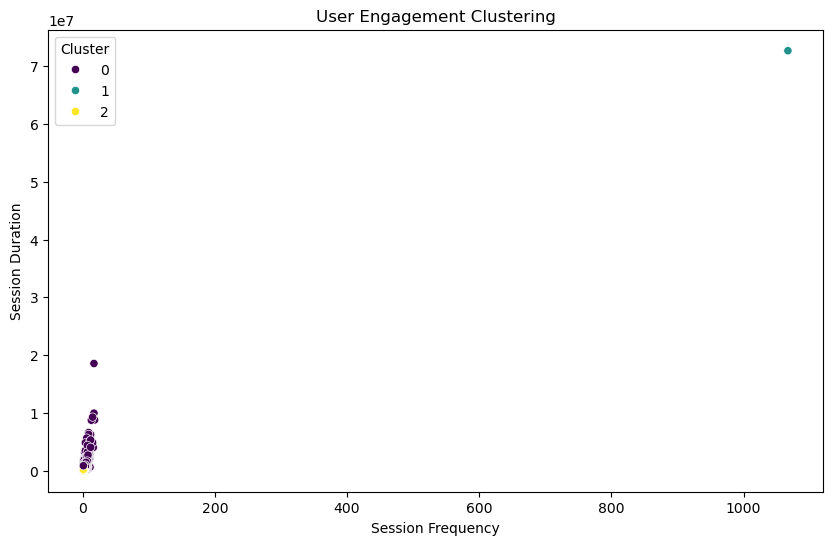

In [42]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=metrics, x='session_frequency', y='session_duration', hue='cluster', palette='viridis')
plt.title('User Engagement Clustering')
plt.xlabel('Session Frequency')
plt.ylabel('Session Duration')
plt.legend(title='Cluster')
plt.savefig('../data/cluster_visualization.png')
plt.show()


In [44]:
# Aggregate User Total Traffic per Application
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
application_traffic = {}
for app in applications:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    traffic_col = f'{app}_total_traffic'
    df[traffic_col] = df[dl_col] + df[ul_col]
    app_traffic = df.groupby('MSISDN/Number')[traffic_col].sum()
    top_10_app_users = app_traffic.nlargest(10)
    application_traffic[app] = top_10_app_users

print("Top 10 Most Engaged Users per Application:\n")
application_traffic


Top 10 Most Engaged Users per Application:



{'Social Media': MSISDN/Number
 3.366371e+10    1.974199e+09
 3.362632e+10    4.337478e+07
 3.376054e+10    3.978319e+07
 3.365973e+10    3.541236e+07
 3.361489e+10    2.829454e+07
 3.362578e+10    2.713550e+07
 3.366716e+10    2.424785e+07
 3.378632e+10    2.397492e+07
 3.366907e+10    2.380083e+07
 3.360313e+10    2.307782e+07
 Name: Social Media_total_traffic, dtype: float64,
 'Google': MSISDN/Number
 3.366371e+10    8.250702e+09
 3.362632e+10    1.521919e+08
 3.362578e+10    1.423079e+08
 3.361489e+10    1.279738e+08
 3.376054e+10    1.232231e+08
 3.365973e+10    1.165163e+08
 3.378632e+10    1.102545e+08
 3.367588e+10    1.098605e+08
 3.366716e+10    1.050327e+08
 3.376127e+10    9.708999e+07
 Name: Google_total_traffic, dtype: float64,
 'Email': MSISDN/Number
 3.366371e+10    2.403622e+09
 3.362632e+10    4.241878e+07
 3.361489e+10    4.078863e+07
 3.362578e+10    4.063397e+07
 3.378632e+10    3.631012e+07
 3.365973e+10    3.599979e+07
 3.376054e+10    3.369377e+07
 3.367588e+10 

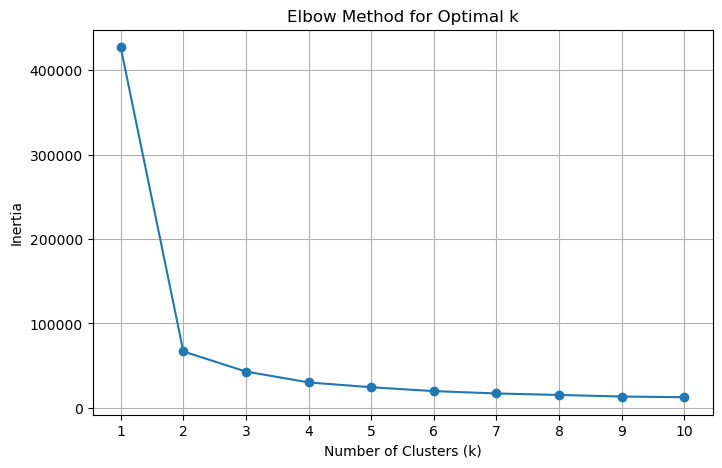

In [45]:
# Optimal Number of Clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(metrics_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig('../data/elbow_method.png')
plt.show()

In [21]:

# Aggregate total traffic per application and find top 10 users per app
app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
               'Google DL (Bytes)', 'Google UL (Bytes)', 
               'Email DL (Bytes)', 'Email UL (Bytes)', 
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
               'Other DL (Bytes)', 'Other UL (Bytes)']


In [22]:
# Total traffic per application
df['Total Social Media Traffic'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Total Google Traffic'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Total Email Traffic'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Total Youtube Traffic'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Total Netflix Traffic'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Total Gaming Traffic'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Total Other Traffic'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


In [23]:

# Aggregating traffic per user (MSISDN/Number) for each application
app_traffic = df.groupby('MSISDN/Number').agg({
    'Total Social Media Traffic': 'sum',
    'Total Google Traffic': 'sum',
    'Total Email Traffic': 'sum',
    'Total Youtube Traffic': 'sum',
    'Total Netflix Traffic': 'sum',
    'Total Gaming Traffic': 'sum',
    'Total Other Traffic': 'sum'
}).reset_index()

In [24]:
# Top 10 most engaged users per application
top_10_social_media = app_traffic.nlargest(10, 'Total Social Media Traffic')
top_10_google = app_traffic.nlargest(10, 'Total Google Traffic')
top_10_youtube = app_traffic.nlargest(10, 'Total Youtube Traffic')


In [25]:
top_10_social_media

,MSISDN/Number,Total Social Media Traffic,Total Google Traffic,Total Email Traffic,Total Youtube Traffic,Total Netflix Traffic,Total Gaming Traffic,Total Other Traffic
53644,3.366371e+10,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,2.428211e+10,4.616346e+11,4.516521e+11
13526,3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09
92923,3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,3.346433e+08,7.461045e+09,4.716134e+09
37052,3.365973e+10,3.541236e+07,1.165163e+08,3.599979e+07,2.579911e+08,3.995191e+08,6.725559e+09,6.317415e+09
6437,3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09
13180,3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09
65118,3.366716e+10,2.424785e+07,1.050327e+08,3.033580e+07,3.152313e+08,3.139395e+08,4.725622e+09,4.941519e+09
106137,3.378632e+10,2.397492e+07,1.102545e+08,3.631012e+07,2.147639e+08,3.059398e+08,4.851096e+09,4.252487e+09
70960,3.366907e+10,2.380083e+07,7.782468e+07,2.292341e+07,2.364028e+08,2.120090e+08,3.269152e+09,4.605369e+09
666,3.360313e+10,2.307782e+07,8.692902e+07,2.619890e+07,2.840901e+08,2.604884e+08,4.191445e+09,6.326671e+09


In [26]:
top_10_google

,MSISDN/Number,Total Social Media Traffic,Total Google Traffic,Total Email Traffic,Total Youtube Traffic,Total Netflix Traffic,Total Gaming Traffic,Total Other Traffic
53644,3.366371e+10,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,2.428211e+10,4.616346e+11,4.516521e+11
13526,3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09
13180,3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09
6437,3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09
92923,3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,3.346433e+08,7.461045e+09,4.716134e+09
37052,3.365973e+10,3.541236e+07,1.165163e+08,3.599979e+07,2.579911e+08,3.995191e+08,6.725559e+09,6.317415e+09
106137,3.378632e+10,2.397492e+07,1.102545e+08,3.631012e+07,2.147639e+08,3.059398e+08,4.851096e+09,4.252487e+09
76363,3.367588e+10,1.922292e+07,1.098605e+08,3.151442e+07,3.174106e+08,3.090932e+08,6.970568e+09,6.798515e+09
65118,3.366716e+10,2.424785e+07,1.050327e+08,3.033580e+07,3.152313e+08,3.139395e+08,4.725622e+09,4.941519e+09
94654,3.376127e+10,1.449608e+07,9.708999e+07,2.075372e+07,2.727896e+08,2.920913e+08,4.274099e+09,5.077779e+09


In [27]:
top_10_youtube

,MSISDN/Number,Total Social Media Traffic,Total Google Traffic,Total Email Traffic,Total Youtube Traffic,Total Netflix Traffic,Total Gaming Traffic,Total Other Traffic
53644,3.366371e+10,1.974199e+09,8.250702e+09,2.403622e+09,2.435073e+10,2.428211e+10,4.616346e+11,4.516521e+11
13180,3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09
92923,3.376054e+10,3.978319e+07,1.232231e+08,3.369377e+07,3.962892e+08,3.346433e+08,7.461045e+09,4.716134e+09
6437,3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09
13526,3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09
76363,3.367588e+10,1.922292e+07,1.098605e+08,3.151442e+07,3.174106e+08,3.090932e+08,6.970568e+09,6.798515e+09
65118,3.366716e+10,2.424785e+07,1.050327e+08,3.033580e+07,3.152313e+08,3.139395e+08,4.725622e+09,4.941519e+09
13994,3.362708e+10,1.780891e+07,8.712592e+07,2.356722e+07,3.087908e+08,2.670409e+08,4.972353e+09,5.117791e+09
92577,3.376041e+10,2.077720e+07,8.273872e+07,2.557696e+07,3.031691e+08,3.183475e+08,6.268620e+09,4.101645e+09
86455,3.369879e+10,1.572816e+07,7.973612e+07,2.905904e+07,3.026620e+08,2.682475e+08,5.753743e+09,4.689876e+09


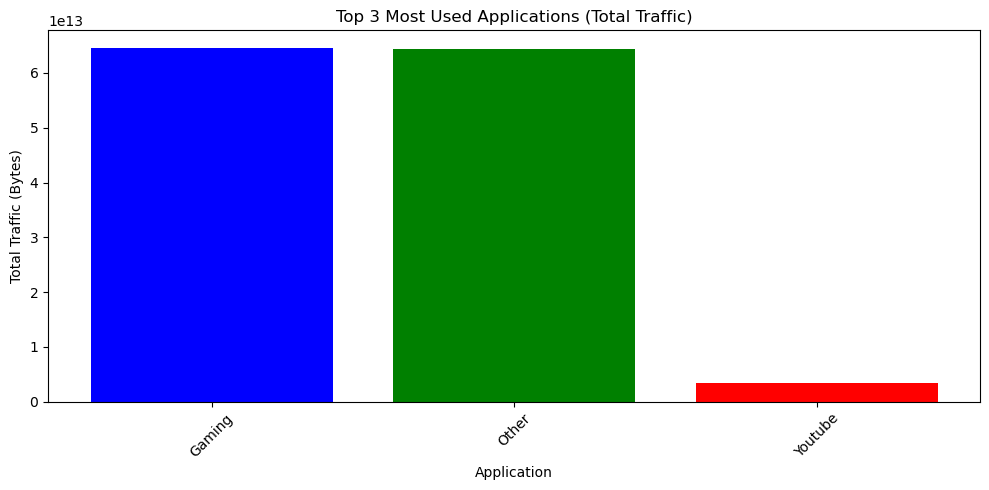

In [49]:
# Aggregate Total Traffic per Application
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
application_traffic = {}
for app in applications:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    traffic_col = f'{app}_total_traffic'
    df[traffic_col] = df[dl_col] + df[ul_col]
    app_traffic = df.groupby('MSISDN/Number')[traffic_col].sum()
    application_traffic[app] = app_traffic.sum()

# Identify the Top 3 Most Used Applications
top_3_apps = sorted(application_traffic.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_apps_df = pd.DataFrame(top_3_apps, columns=['Application', 'Total Traffic'])

# Plot Top 3 Most Used Applications
plt.figure(figsize=(10, 5))
plt.bar(top_3_apps_df['Application'], top_3_apps_df['Total Traffic'], color=['blue', 'green', 'red'])
plt.title('Top 3 Most Used Applications (Total Traffic)')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../data/top_3_apps_usage.png')
plt.show()